In [7]:
import pandas as pd
import sys
sys.path.append('./ex_fuzzy/')
sys.path.append('../ex_fuzzy/')

from sklearn import datasets
from sklearn.model_selection import train_test_split

import ex_fuzzy.fuzzy_sets as fs
import ex_fuzzy.evolutionary_fit as GA
import ex_fuzzy.utils as  utils
import ex_fuzzy.eval_tools as eval_tools

In [ ]:
# Choose the parameters for the genetic algorithm
n_gen = 50
n_pop = 30

# Max number of rules and max number of antecedents per rule
nRules = 15
nAnts = 3

# Number of linguistic labels to use in the fuzzy variables
vl = 3 # Low, medium, high

# Tolerance for the dominance score for each rule
tolerance = 0.01

# Type of dataset used
fz_type_studied = fs.FUZZY_SETS.t1 # Also t2, gt2

In [9]:
# Load the iris dataset
iris = datasets.load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

In [10]:
# Split in train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [ ]:
# Compute the linguistic vatiables
precomputed_partitions = utils.construct_partitions(X, fz_type_studied)

# Create and fit the FRB classifier using a genetic algorithm
fl_classifier = GA.BaseFuzzyRulesClassifier(nRules=nRules, linguistic_variables=precomputed_partitions, nAnts=nAnts, 
                                            n_linguistic_variables=vl, fuzzy_type=fz_type_studied, verbose=False, tolerance=tolerance)
fl_classifier.fit(X_train, y_train, n_gen=n_gen, pop_size=n_pop)

------------
ACCURACY
Train performance: 0.97
Test performance: 0.98
------------
MATTHEW CORRCOEF
Train performance: 0.9550581383455296
Test performance: 0.9705012819357025
------------
Rules for consequent: 0
----------------
IF petal length (cm) IS Low AND petal width (cm) IS Low WITH DS 0.3191356674966381, ACC 1.0

Rules for consequent: 1
----------------
IF petal length (cm) IS Medium AND petal width (cm) IS Medium WITH DS 0.24988292610187673, ACC 0.9666666666666667

Rules for consequent: 2
----------------
IF petal length (cm) IS High WITH DS 0.28033991833131, ACC 0.9444444444444444




c:\Users\javi-\anaconda3\envs\datasci\Lib\site-packages\ex_fuzzy\vis_rules.py:364: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
c:\Users\javi-\anaconda3\envs\datasci\Lib\site-packages\ex_fuzzy\vis_rules.py:364: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
c:\Users\javi-\anaconda3\envs\datasci\Lib\site-packages\ex_fuzzy\vis_rules.py:364: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
c:\Users\javi-\anaconda3\envs\datasci\Lib\site-packages\ex_fuzzy\vis_rules.py:364: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


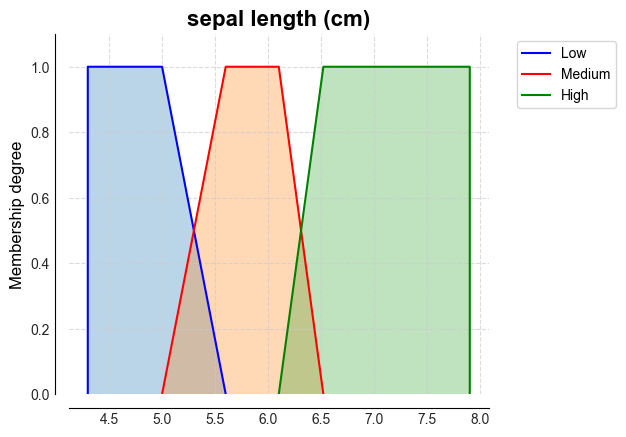

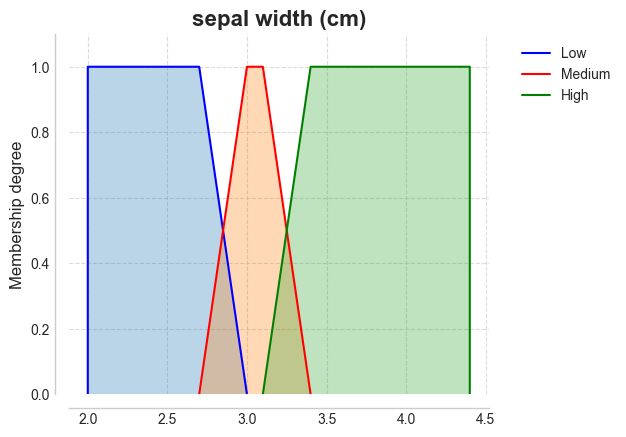

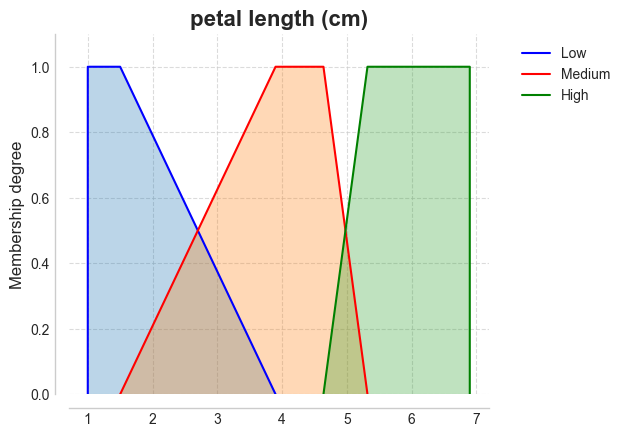

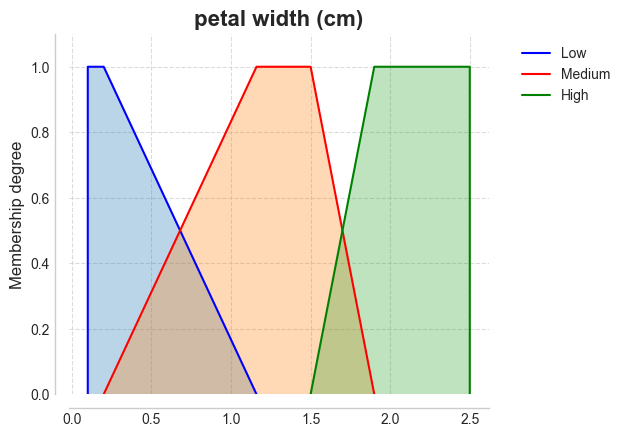

In [ ]:
# Display the classifier performance and visualize the results
fuzzy_evaluator = eval_tools.FuzzyEvaluator(fl_classifier)
str_rules = fuzzy_evaluator.eval_fuzzy_model(X_train, y_train, X_test, y_test, 
                        plot_rules=False, print_rules=True, plot_partitions=True, return_rules=True)